In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df=pd.read_csv('/Users/niravsatani/Documents/DATASETs/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df['male']=pd.get_dummies(df['Sex'],drop_first=True)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [6]:
df=df.drop('Sex', axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [7]:
df_male=df[df['male']==1]
df_male.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,S,1


# Exploratory Data Analysis

In [8]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,True,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,True,False,False,False,False,True,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False


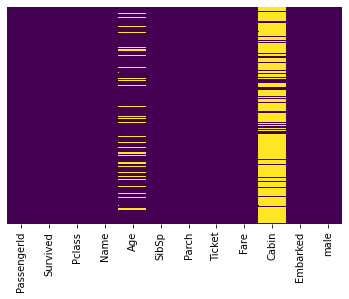

In [9]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

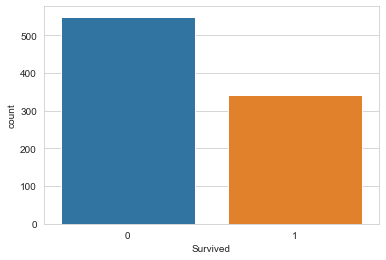

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data= df)

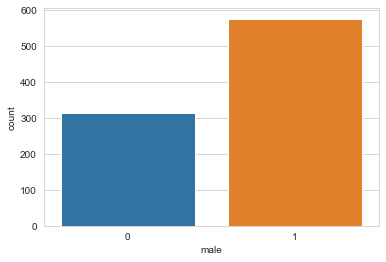

In [11]:
sns.countplot(x='male', data= df)

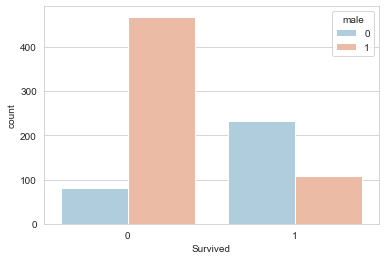

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='male',data=df, palette='RdBu_r')

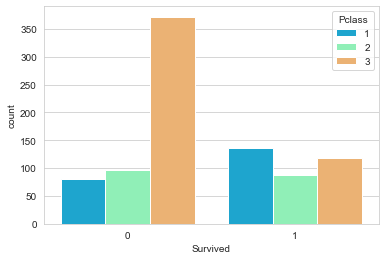

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass',data=df, palette='rainbow')

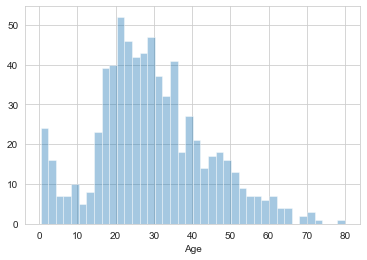

In [14]:
#Distribution of Age
sns.distplot(df['Age'].dropna(),kde=False, bins=40)

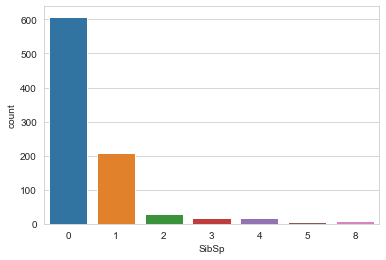

In [15]:
sns.countplot(x='SibSp', data=df)

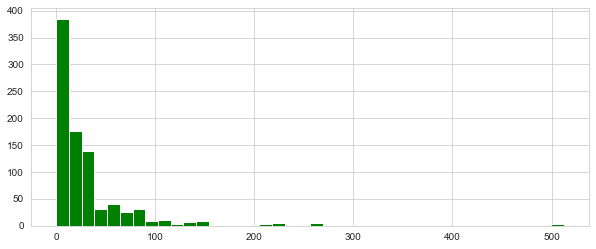

In [16]:
df['Fare'].hist(color='green', bins=40, figsize=(10,4))

## Data cleaning

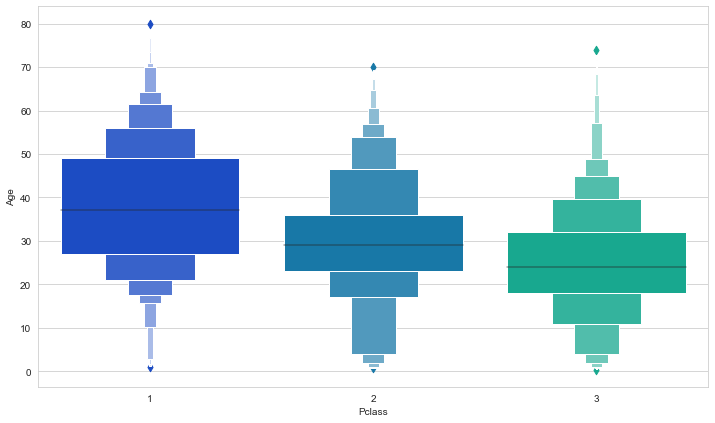

In [17]:
plt.figure(figsize=(12,7))
sns.boxenplot(x='Pclass',y='Age', data=df, palette='winter')

In [18]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if(pd.isnull(Age)):
        if(Pclass == 1):
            return 37
        elif(Pclass == 2):
            return 29
        else:
            return 24
    else: 
        return Age

In [19]:
df['Age']= df[['Age', 'Pclass']].apply(impute_age, axis=1)

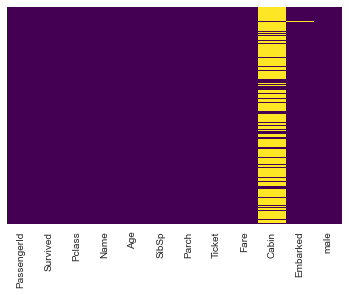

In [20]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [21]:
df.drop('Cabin', axis=1, inplace=True)

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,1


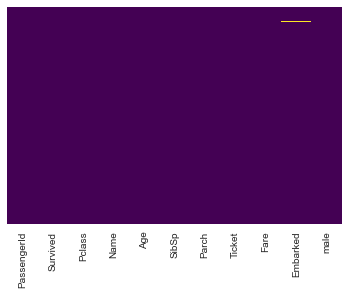

In [23]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [24]:
pd.get_dummies(df['Embarked'], drop_first=True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [25]:
embark=pd.get_dummies(df['Embarked'], drop_first=True)

In [26]:
df.drop(['Embarked','Pclass','Name','Ticket'], axis=1, inplace=True)

In [27]:
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male
0,1,0,22.0,1,0,7.2500,1
1,2,1,38.0,1,0,71.2833,0
2,3,1,26.0,0,0,7.9250,0
3,4,1,35.0,1,0,53.1000,0
4,5,0,35.0,0,0,8.0500,1


In [28]:
df= pd.concat([df, embark], axis=1)

In [29]:
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,0,35.0,0,0,8.0500,1,0,1


# Test data set

In [30]:
test_df= pd.read_csv('/Users/niravsatani/Documents/DATASETs/titanic/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


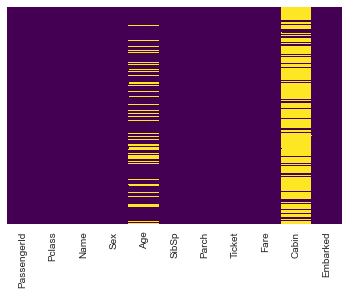

In [31]:
sns.heatmap(test_df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [32]:
test_df.drop('Cabin', axis=1, inplace=True)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


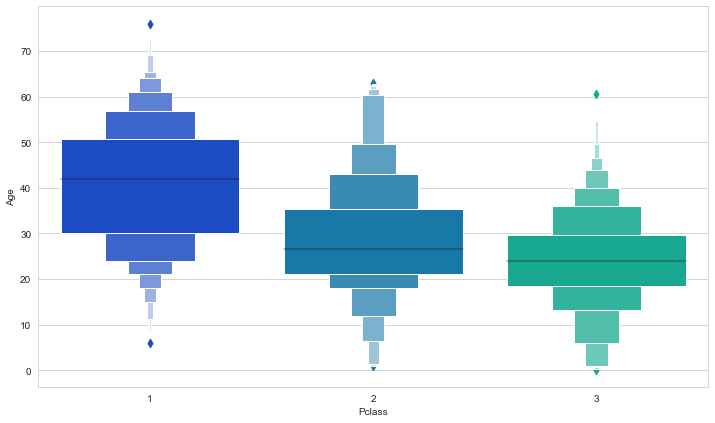

In [33]:
#data cleaning
plt.figure(figsize=(12,7))
sns.boxenplot(x='Pclass',y='Age', data=test_df, palette='winter')

In [34]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if(pd.isnull(Age)):
        if(Pclass == 1):
            return 41
        elif(Pclass == 2):
            return 28
        else:
            return 25
    else: 
        return Age

In [35]:
test_df['Age']= test_df[['Age', 'Pclass']].apply(impute_age, axis=1)

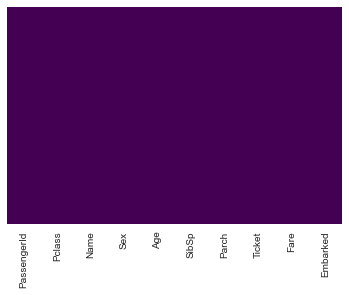

In [36]:
sns.heatmap(test_df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [37]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [38]:
male=pd.get_dummies(test_df['Sex'], drop_first=True)
embarked= pd.get_dummies(test_df['Embarked'], drop_first=True)

In [39]:
test_df=pd.concat([test_df, male, embarked], axis=1)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1


In [40]:
test_df=test_df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1)

In [41]:
test_df.head()

,PassengerId,Age,SibSp,Parch,Fare,male,Q,S
0,892,34.5,0,0,7.8292,1,1,0
1,893,47.0,1,0,7.0000,0,0,1
2,894,62.0,0,0,9.6875,1,1,0
3,895,27.0,0,0,8.6625,1,0,1
4,896,22.0,1,1,12.2875,0,0,1


# Logistic Regression Model

In [42]:
#train data
df.drop('Survived', axis=1)

,PassengerId,Age,SibSp,Parch,Fare,male,Q,S
0,1,22.0,1,0,7.2500,1,0,1
1,2,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,4,35.0,1,0,53.1000,0,0,1
4,5,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,887,27.0,0,0,13.0000,1,0,1
887,888,19.0,0,0,30.0000,0,0,1
888,889,24.0,1,2,23.4500,0,0,1
889,890,26.0,0,0,30.0000,1,0,0


In [43]:
df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(['Survived'],axis=1),
                                              df['Survived'], test_size=0.04,
                                              random_state=101)

# Training and Predicting

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

/Users/niravsatani/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [87]:
predictions=logmodel.predict(x_test)

In [88]:
from sklearn.metrics import confusion_matrix

In [89]:
accuracy=confusion_matrix(y_test,predictions)
print(accuracy)

[[19  0]
 [ 6 11]]


In [90]:
from sklearn.metrics import accuracy_score

In [91]:
print(accuracy_score(y_test,predictions))

0.8333333333333334


In [92]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1])

In [53]:
#predictions=logmodel.predict(test_df)
np.any(np.isnan(test_df))


True

In [54]:
test_df.isnull().values.any().sum()

1

In [55]:
test_df.head()

,PassengerId,Age,SibSp,Parch,Fare,male,Q,S
0,892,34.5,0,0,7.8292,1,1,0
1,893,47.0,1,0,7.0000,0,0,1
2,894,62.0,0,0,9.6875,1,1,0
3,895,27.0,0,0,8.6625,1,0,1
4,896,22.0,1,1,12.2875,0,0,1


In [56]:
test_df['Fare'].isnull().sum()

1

In [57]:
test_df['Fare'].mean()

35.6271884892086

In [58]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())

In [59]:
test_df['Fare'].isnull().sum()

0

In [60]:
test_df.isnull().values.any().sum()

0

In [93]:
predictions=logmodel.predict(test_df)

In [94]:
submit = pd.DataFrame(predictions, columns = ['Survived'])


In [95]:
submit.shape


(418, 1)

In [96]:
test_df.head()

,PassengerId,Age,SibSp,Parch,Fare,male,Q,S
0,892,34.5,0,0,7.8292,1,1,0
1,893,47.0,1,0,7.0000,0,0,1
2,894,62.0,0,0,9.6875,1,1,0
3,895,27.0,0,0,8.6625,1,0,1
4,896,22.0,1,1,12.2875,0,0,1


In [97]:
ans=pd.concat([test_df['PassengerId'],submit],axis=1)

In [98]:
ans.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [99]:
ans.to_csv('ans1.csv', index=False)